# Face Detetion using OpenCV

OpenCV has Object Detection Modules suach as haar cascade classifier. This Module has many classifiers such as eye, left_eye, face, license_plate_number, lower_body, full_body, etc. To know more about the avialable modules, please have a look on this

https://github.com/opencv/opencv/tree/4.x/data

We will use here in this its face recognizer.The face detector just detects where is the face is, but the face recognizer recognizes whose the face is.

I choose the haarcascade_frontalcatface, this classifier needs a gray images. It decides the face from edges inside the image. (I downloadded this xml file from raw button on the right side in Github, then saved it inside the project folder)

## Face Detetion for images


In [108]:
import cv2 as cv
import matplotlib.pyplot as plt

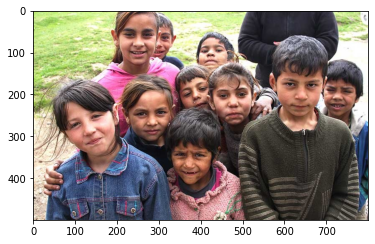

In [167]:
img = cv.imread('children1.jpg')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))


In [120]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

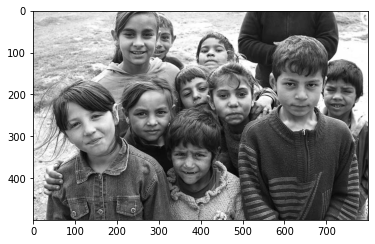

In [121]:
plt.imshow(gray, cmap='gray')


In [122]:
# Create haarCascade object of CascadeClassifier(), pass to this function the path of xml file.
#This CascadeClassifier() will read the xml file and store it in the variable 
haar_cascade = cv.CascadeClassifier('haarcascade_frontalcatface.xml')

detectMultiScale(gray_image, sacleFactor, minNeighbors) function is inside the object haar_cascade, which will be used to detect the faces inside the input gray image. This fuction paramters are as follows:


- image	Matrix of the type CV_8U containing an image where objects are detected.
- scaleFactor	Parameter specifying how much the image size is reduced at each image scale.
- minNeighbors	Parameter specifying how many neighbors each candidate rectangle should have to retain it.
- flags	Parameter with the same meaning for an old cascade as in the function cvHaarDetectObjects. It is not used for a new cascade.
- minSize	Minimum possible object size. Objects smaller than that are ignored.
- maxSize	Maximum possible object size. Objects larger than that are ignored. If maxSize == minSize model is evaluated on single scale.

In [165]:
# To detect faces use detectMultiScale()
haar_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=1, minSize=(15, 15))

Note: haar_rect contains rectangle and coordinates of that rectangle.

In [166]:
len(haar_rect)

5

To draw the faces detected in this image, we loop this list and grap the coordinates of those images and draw the rectangle over the detected faces.

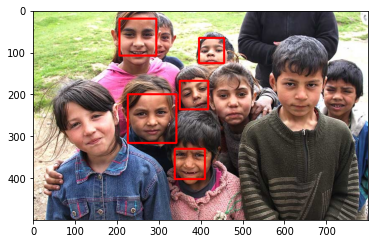

In [168]:
for x,y,w,h in haar_rect:
    cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), thickness = 3)


plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))


Note in the above image haarcascade_frontalcatface can only detect 5 faces. Also, it didn't detect if the face is not prendicular to camera.

# Face Detetion for video


In [189]:
haar_cascade = cv.CascadeClassifier('haarcascade_frontalcatface.xml')
# To know more about VideoCapture please have a look on openCV tutorial in the same repo
captured = cv.VideoCapture('London_streets.mp4')

is_true, frame = captured.read()

while is_true:
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    haar_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(30, 30))
    
    
    for x,y,w,h in haar_rect:
        cv.rectangle(frame, (x,y), (x+w, y+h), (0,0,255), thickness = 3)
    
    
    cv.imshow('frame', frame)
    
    for i in range(0,6):
        is_true, frame = captured.read()
    
    # Wait for Esc key to stop 
    k = cv.waitKey(30) & 0xff
    if k == 27: 
        break
  
captured.release() 
  
# De-allocate any associated memory usage 
cv.destroyAllWindows() 


